#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')
# boston_df=pd.read_csv('C:\\Project\\2024-Learn-Python\\Pyhton\\boston_housing.csv')

## Task 2: Generate Descriptive Statistics and Visualizations

#### Boxplot for "Median value of owner-occupied homes" provide a boxplot

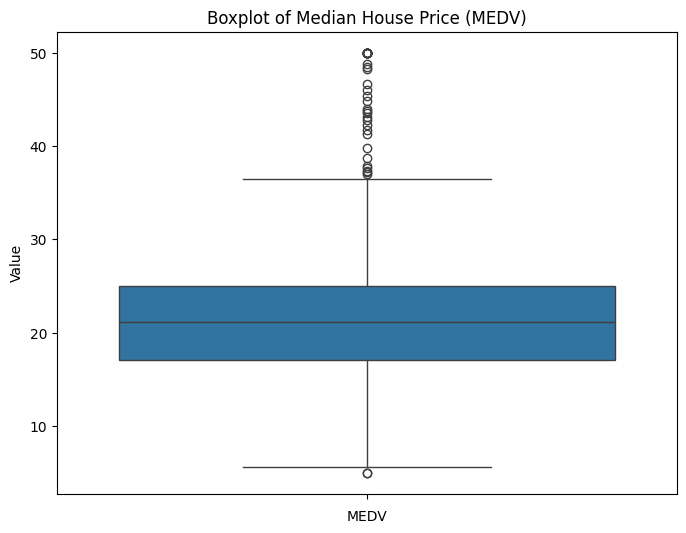

In [23]:
# Generate boxplot for "Median value of owner-occupied homes" provide a boxplot
pyplot.figure(figsize=(8,6))
sns.boxplot(boston_df['MEDV'])

# Add title and labels
pyplot.title("Boxplot of Median House Price (MEDV)")
pyplot.xlabel("MEDV")
pyplot.ylabel("Value")

# Display plot
pyplot.show()

##### <em> <mark>**Explaination :**</mark> Most of the Median value of Owner-occupied homes values are <strong> between 18 to 24 thousands </strong></em>

####  bar plot for the Charles river variable

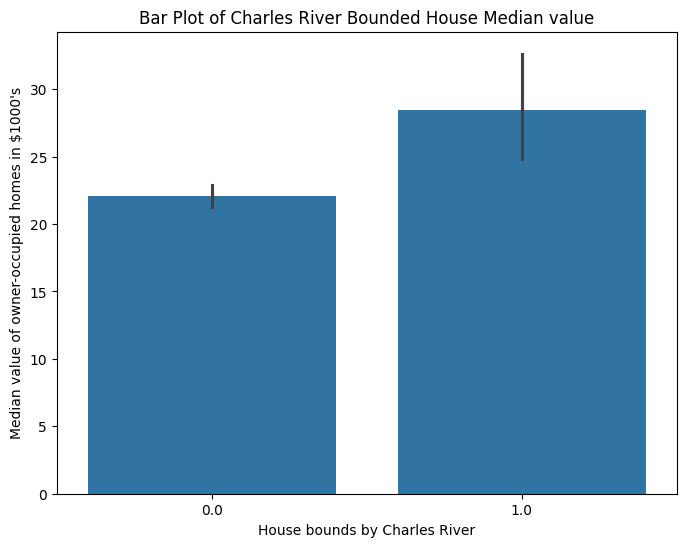

In [183]:
# Generate bar plot for the Charles river variable
pyplot.figure(figsize=(8,6))
sns.barplot(data=boston_df, x='CHAS', y='MEDV')

# Add title and labels
pyplot.title("Bar Plot of Charles River Bounded House Median value")
pyplot.xlabel("House bounds by Charles River")
pyplot.ylabel("Median value of owner-occupied homes in $1000's")

# Display plot
pyplot.show()


##### <em> <mark>**Explaination :**</mark> Median value of Owner-occupied homes values are bounds by Charles River  <strong> are higher in value </strong></em>

### boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

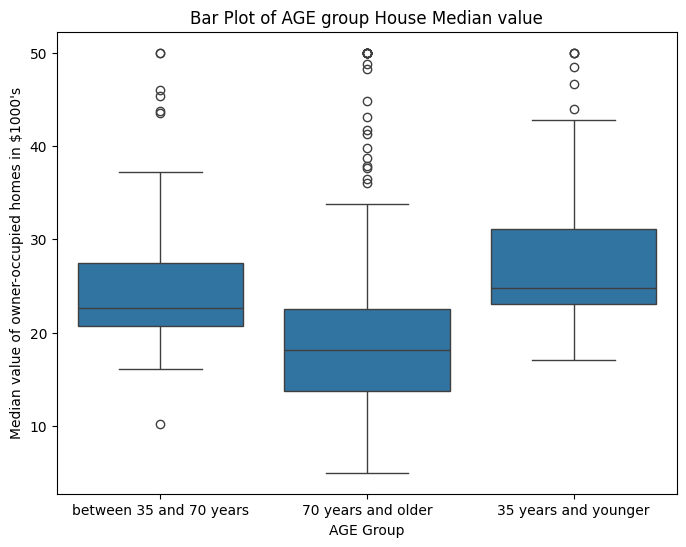

In [184]:
# Provide a boxplot for the MEDV variable vs the AGE variable. 
# (Discretize the age variable into three groups of 35 years and younger, 
# between 35 and 70 years and 70 years and older)

boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_group'] = '70 years and older'

# Generate bar plot for AGE Grouping
pyplot.figure(figsize=(8,6))
sns.boxplot(x=boston_df['AGE_group'], y=boston_df['MEDV'])

# Add title and labels
pyplot.title("Bar Plot of AGE group House Median value")
pyplot.xlabel("AGE Group")
pyplot.ylabel("Median value of owner-occupied homes in $1000's")

# Display plot
pyplot.show()

##### <em> <mark>**Explaination :**</mark> Median value of Owner-occupied homes values are lower for older group of the house; however, there are some exceptions 

### Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

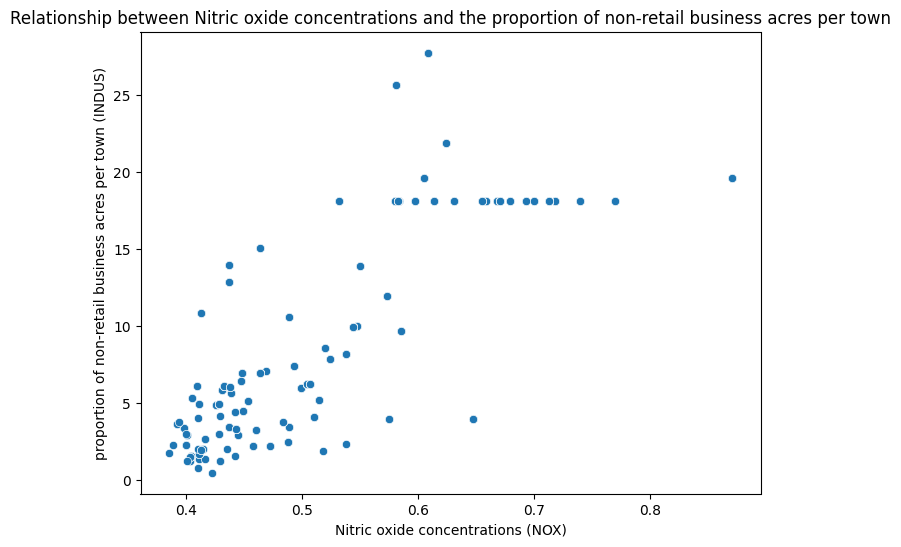

In [ ]:
# Provide a scatter plot to show the relationship between 
# Nitric oxide concentrations and the proportion of non-retail business acres per town. 
# What can you say about the relationship?

pyplot.figure(figsize=(8,6))
sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

# Add title and labels
pyplot.title("Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town")
pyplot.xlabel("Nitric oxide concentrations (NOX)")
pyplot.ylabel("proportion of non-retail business acres per town (INDUS)")

# Display plot
pyplot.show()

##### <em> <mark>**Explaination :**</mark> There seems to be a correlationship between Nitrix Oxide concentrations with proportion of non-reail business acres per town from the plot.  Higher concentration of Nitrix oxide is observed for higher proportion of non-retail acres per town

### Histogram for the pupil to teacher ratio variable

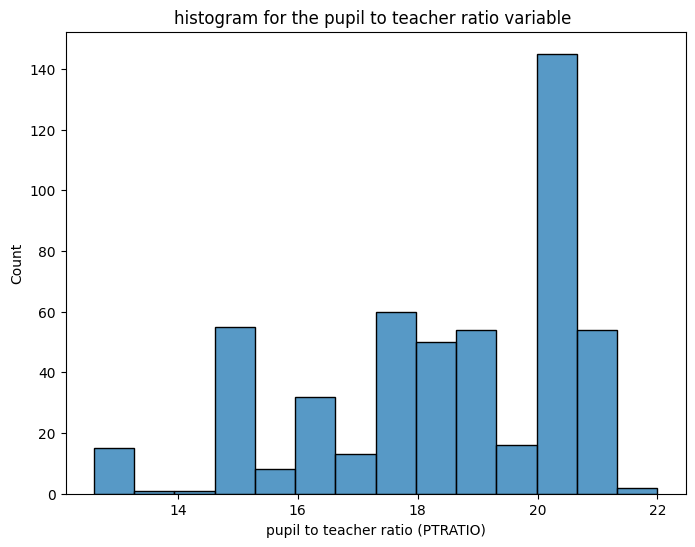

In [186]:
# Create a histogram for the pupil to teacher ratio variable (PTRATIO)

pyplot.figure(figsize=(8,6))
sns.histplot(x="PTRATIO", data=boston_df)

# Add title and labels
pyplot.title("histogram for the pupil to teacher ratio variable ")
pyplot.xlabel("pupil to teacher ratio (PTRATIO)")
pyplot.ylabel("Count")

# Display plot
pyplot.show()

##### <em> <mark>**Explaination :**</mark> bulk of the school has Pupil to teacher ratio from 18 to 21,  with 20 being the highest

# Task 3: Use the appropriate tests to answer the questions provided.

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

We used the t-test to test if there was a statistical difference in the median value of houses bounded by the Charles river or not? 

We will state the null hypothesis:
* $H_0: No significant difference in median value of houses bounded by the Charles river
* $H_1: There is significant difference in median value of houses bounded by the Charles river


In [187]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

<mark>**Conclusion:** </mark> Like the t-test, the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis and concluded that ere is significant difference in median value of houses bounded by the Charles river


### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In order to perform ANOVA statistical difference in the median value of each proportion of owner-occupied, 
we discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older

State the Hypothesis:
* $H_0: µ1 = µ2 = µ3$ (Median values of houses between three House Age groups are equal)
* $H_1:$ At least one of the means differ


In [196]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE_group', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

              df        sum_sq      mean_sq         F        PR(>F)
AGE_group    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual   503.0  37314.563532    74.184023       NaN           NaN


<mark>**Conclusion:** </mark> We reject the null hypothesis since the p-value is less than 0.05 there is significant evidence that at least one of the Median Value for house with their age.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)



In [200]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209157, pvalue=7.91336106123623e-98)

<mark>**Conclusion:** </mark>  p less than 0.05, hence there is evidence of correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [202]:
## X is the input variables (or independent variables)
X = boston_df['MEDV']
## y is the target/dependent variable
y = boston_df['DIS']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DIS   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 02 Feb 2025   Prob (F-statistic):           1.21e-08
Time:                        23:49:10   Log-Likelihood:                -1078.0
No. Observations:                 506   AIC:                             2160.
Df Residuals:                     504   BIC:                             2168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5057      0.240     10.428      0.000       2.034       2.978
MEDV           0.0572      0.010      5.795      0.000       0.038       0.077
==============================================================================
Omnibus:                       70.837   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.167
Skew:                           1.000   Prob(JB):                     4.82e-22
Kurtosis:                       3.809   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<mark>**Conclusion:** </mark>  As the P value is less than 0.05; hence, there is impact of additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes. Each additional weighted distance will mean 0.0572 increase in Median value of house